In [58]:
# Cell 1
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import os
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

seed_value = 42  # Change this value for each run
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)


Modified timestamps for file u00082s00001_hw00002.svc:
0     0
1     8
2    15
3    23
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00015s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00004s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32




C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)


Modified timestamps for file u00036s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00032s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00029s00001_hw00002.svc:
0     0
1     8
2    15
3    23
4    31
Name: timestamp, dtype: int32


Modified timestamps for file u00018s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32




C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecat

Modified timestamps for file u00014s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00070s00001_hw00002.svc:
0     0
1     8
2    15
3    23
4    30
Name: timestamp, dtype: int32


Modified timestamps for file u00012s00001_hw00002.svc:
0     0
1     7
2    15
3    22
4    30
Name: timestamp, dtype: int32




C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
C:\Users\annek\AppData\Local\Temp\ipykernel_6884\2178649778.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)


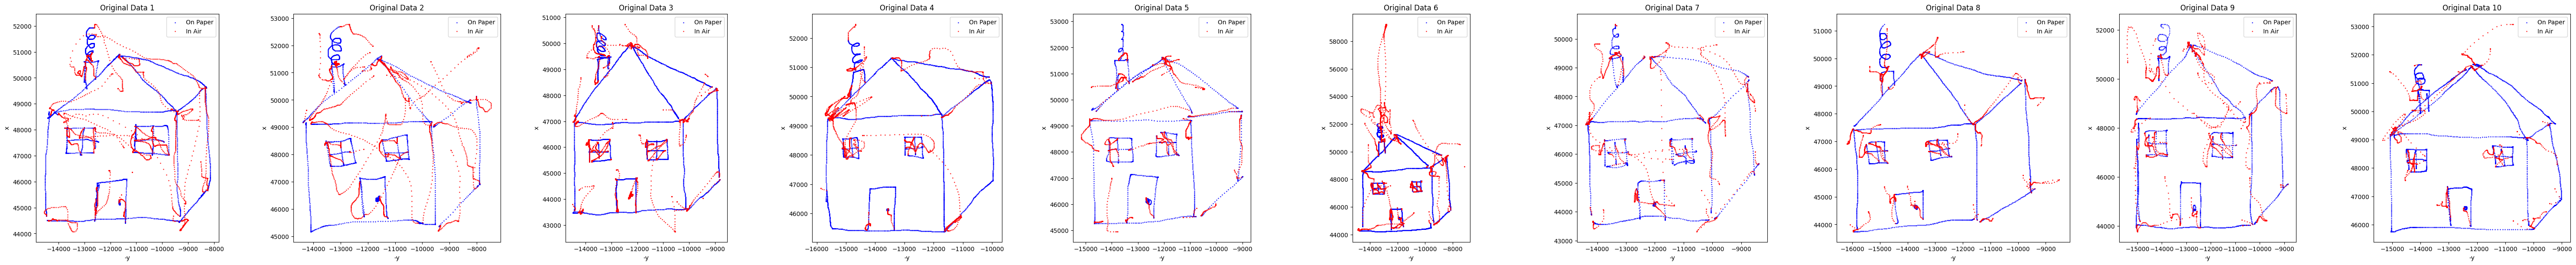

Processed data shape: (42760, 4)
Average number of data points: 4276


In [59]:
# Cell 2 (modified)
def upload_and_process_files(directory, num_files_to_use=None):
    svc_files = [f for f in os.listdir(directory) if f.endswith('.svc')]
    
    if num_files_to_use:
        svc_files = random.sample(svc_files, num_files_to_use)
    else:
        random.shuffle(svc_files)  # Randomize the order of all files

    data_frames = []
    scalers = []

    num_files = len(svc_files)
    fig, axs = plt.subplots(1, num_files, figsize=(6*num_files, 6), constrained_layout=True)
    if num_files == 1:
        axs = [axs]

    for i, filename in enumerate(svc_files):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, skiprows=1, header=None, delim_whitespace=True)
        df.columns = ['x', 'y', 'timestamp', 'pen_status', 'pressure', 'azimuth', 'altitude']
        
        # Modify timestamp to start from 0
        df['timestamp'] = (df['timestamp'] - df['timestamp'].min()).round().astype(int)
        
        df = df.iloc[:, [0, 1, 2, 3]]  # Select x, y, timestamp, and pen_status
        data_frames.append(df)
        scaler = MinMaxScaler()
        scaler.fit(df[['x', 'y', 'timestamp']])
        scalers.append(scaler)

        on_paper = df[df['pen_status'] == 1]
        in_air = df[df['pen_status'] == 0]
        axs[i].scatter(-on_paper['y'], on_paper['x'], c='blue', s=1, alpha=0.7, label='On Paper')
        axs[i].scatter(-in_air['y'], in_air['x'], c='red', s=1, alpha=0.7, label='In Air')
        axs[i].set_title(f'Original Data {i + 1}')
        axs[i].set_xlabel('-y')
        axs[i].set_ylabel('x')
        axs[i].legend()
        axs[i].set_aspect('equal')

        # Print the first few rows of the timestamp column
        print(f"Modified timestamps for file {filename}:")
        print(df['timestamp'].head())
        print("\n")

    plt.show()

    combined_data = np.vstack([np.column_stack((scaler.transform(df[['x', 'y', 'timestamp']]), df['pen_status'].values)) 
                               for df, scaler in zip(data_frames, scalers)])
    avg_data_points = int(np.mean([df.shape[0] for df in data_frames]))

    return data_frames, combined_data, scalers, avg_data_points

directory = 'Task2'  # Directory where the .svc files are stored
data_frames, combined_data, scalers, avg_data_points = upload_and_process_files(directory, num_files_to_use=10)
print(f"Processed data shape: {combined_data.shape}")
print(f"Average number of data points: {avg_data_points}")

In [60]:
# Cell 3 (modified)
class VAE(tf.keras.Model):
    def __init__(self, latent_dim, beta=1.0):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.beta = beta
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(4,)),  # Changed to 4 for x, y, timestamp, pen_status
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim * 2)
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(4)  # Changed to 4 for x, y, timestamp, pen_status
        ])

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z):
        decoded = self.decoder(z)
        xy_timestamp = tf.sigmoid(decoded[:, :3])  # x, y, and timestamp
        pen_status = tf.sigmoid(decoded[:, 3])
        return tf.concat([xy_timestamp, tf.expand_dims(pen_status, -1)], axis=1)

    def call(self, inputs):
        mean, logvar = self.encode(inputs)
        z = self.reparameterize(mean, logvar)
        return self.decode(z), mean, logvar

# Function to compute loss
def compute_loss(model, x):
    x_reconstructed, mean, logvar = model(x)
    reconstruction_loss_xy_timestamp = tf.reduce_mean(tf.keras.losses.mse(x[:, :3], x_reconstructed[:, :3]))
    reconstruction_loss_pen = tf.reduce_mean(tf.keras.losses.binary_crossentropy(x[:, 3], x_reconstructed[:, 3]))
    kl_loss = -0.5 * tf.reduce_mean(1 + logvar - tf.square(mean) - tf.exp(logvar))
    return reconstruction_loss_xy_timestamp + reconstruction_loss_pen, kl_loss, model.beta * kl_loss

latent_dim = 256
beta = 0.0000001
learning_rate = 0.001

vae = VAE(latent_dim, beta)
optimizer = tf.keras.optimizers.Adam(learning_rate)

C:\Users\annek\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100: 100%|██████████| 84/84 [00:08<00:00, 10.18batch/s, Total Loss=0.0625, Reconstruction Loss=0.0625, KL Loss=0.326]


Epoch 1: Total Loss = 0.312058, Reconstruction Loss = 0.312058, KL Divergence Loss = 0.147898
MAE = 0.239934, MSE = 0.079666, NRMSE = 0.282252


Epoch 2/100: 100%|██████████| 84/84 [00:01<00:00, 64.00batch/s, Total Loss=0.0435, Reconstruction Loss=0.0435, KL Loss=0.641]


Epoch 2: Total Loss = 0.053159, Reconstruction Loss = 0.053159, KL Divergence Loss = 0.484125
MAE = 0.268136, MSE = 0.101072, NRMSE = 0.317918


Epoch 3/100: 100%|██████████| 84/84 [00:01<00:00, 72.63batch/s, Total Loss=0.0233, Reconstruction Loss=0.0233, KL Loss=1.09] 


Epoch 3: Total Loss = 0.031172, Reconstruction Loss = 0.031172, KL Divergence Loss = 0.883540
MAE = 0.299764, MSE = 0.128713, NRMSE = 0.358766


Epoch 4/100: 100%|██████████| 84/84 [00:01<00:00, 68.25batch/s, Total Loss=0.0029, Reconstruction Loss=0.00289, KL Loss=1.94] 


Epoch 4: Total Loss = 0.010592, Reconstruction Loss = 0.010592, KL Divergence Loss = 1.507147
MAE = 0.339076, MSE = 0.165447, NRMSE = 0.406751


Epoch 5/100: 100%|██████████| 84/84 [00:01<00:00, 70.71batch/s, Total Loss=0.00205, Reconstruction Loss=0.00205, KL Loss=2.57]


Epoch 5: Total Loss = 0.002592, Reconstruction Loss = 0.002591, KL Divergence Loss = 2.209272
MAE = 0.358107, MSE = 0.183671, NRMSE = 0.428569


Epoch 6/100: 100%|██████████| 84/84 [00:01<00:00, 72.62batch/s, Total Loss=0.00126, Reconstruction Loss=0.00126, KL Loss=3.09]


Epoch 6: Total Loss = 0.001683, Reconstruction Loss = 0.001683, KL Divergence Loss = 2.737707
MAE = 0.369012, MSE = 0.194830, NRMSE = 0.441396


Epoch 7/100: 100%|██████████| 84/84 [00:01<00:00, 73.64batch/s, Total Loss=0.00115, Reconstruction Loss=0.00115, KL Loss=3.5]  


Epoch 7: Total Loss = 0.001329, Reconstruction Loss = 0.001329, KL Divergence Loss = 3.226512
MAE = 0.374964, MSE = 0.200232, NRMSE = 0.447473


Epoch 8/100: 100%|██████████| 84/84 [00:01<00:00, 72.62batch/s, Total Loss=0.001, Reconstruction Loss=0.001, KL Loss=3.7]       


Epoch 8: Total Loss = 0.001054, Reconstruction Loss = 0.001053, KL Divergence Loss = 3.503428
MAE = 0.374527, MSE = 0.200048, NRMSE = 0.447268


Epoch 9/100: 100%|██████████| 84/84 [00:01<00:00, 70.69batch/s, Total Loss=0.000717, Reconstruction Loss=0.000716, KL Loss=3.85]


Epoch 9: Total Loss = 0.000856, Reconstruction Loss = 0.000855, KL Divergence Loss = 3.803369
MAE = 0.375387, MSE = 0.200980, NRMSE = 0.448308


Epoch 10/100: 100%|██████████| 84/84 [00:01<00:00, 70.70batch/s, Total Loss=0.00066, Reconstruction Loss=0.000659, KL Loss=4.26] 


Epoch 10: Total Loss = 0.000685, Reconstruction Loss = 0.000685, KL Divergence Loss = 4.056411
MAE = 0.374299, MSE = 0.200124, NRMSE = 0.447352


Epoch 11/100: 100%|██████████| 84/84 [00:01<00:00, 71.60batch/s, Total Loss=0.000453, Reconstruction Loss=0.000453, KL Loss=4.43]


Epoch 11: Total Loss = 0.000693, Reconstruction Loss = 0.000693, KL Divergence Loss = 4.266364
MAE = 0.373995, MSE = 0.199915, NRMSE = 0.447118


Epoch 12/100: 100%|██████████| 84/84 [00:01<00:00, 73.65batch/s, Total Loss=0.000547, Reconstruction Loss=0.000546, KL Loss=4.65]


Epoch 12: Total Loss = 0.000536, Reconstruction Loss = 0.000535, KL Divergence Loss = 4.451600
MAE = 0.375116, MSE = 0.201270, NRMSE = 0.448632


Epoch 13/100: 100%|██████████| 84/84 [00:01<00:00, 71.67batch/s, Total Loss=0.000389, Reconstruction Loss=0.000389, KL Loss=4.64]


Epoch 13: Total Loss = 0.000553, Reconstruction Loss = 0.000552, KL Divergence Loss = 4.612608
MAE = 0.375505, MSE = 0.201670, NRMSE = 0.449077


Epoch 14/100: 100%|██████████| 84/84 [00:01<00:00, 72.56batch/s, Total Loss=0.00041, Reconstruction Loss=0.000409, KL Loss=4.78] 


Epoch 14: Total Loss = 0.000585, Reconstruction Loss = 0.000584, KL Divergence Loss = 4.698933
MAE = 0.375268, MSE = 0.200951, NRMSE = 0.448275


Epoch 15/100: 100%|██████████| 84/84 [00:01<00:00, 71.47batch/s, Total Loss=0.000401, Reconstruction Loss=0.000401, KL Loss=5.06]


Epoch 15: Total Loss = 0.000433, Reconstruction Loss = 0.000432, KL Divergence Loss = 4.781519
MAE = 0.375413, MSE = 0.201340, NRMSE = 0.448709


Epoch 16/100: 100%|██████████| 84/84 [00:01<00:00, 72.68batch/s, Total Loss=0.00031, Reconstruction Loss=0.00031, KL Loss=5]     


Epoch 16: Total Loss = 0.000394, Reconstruction Loss = 0.000394, KL Divergence Loss = 4.913389
MAE = 0.375772, MSE = 0.201669, NRMSE = 0.449075


Epoch 17/100: 100%|██████████| 84/84 [00:01<00:00, 69.79batch/s, Total Loss=0.000346, Reconstruction Loss=0.000346, KL Loss=5.24]


Epoch 17: Total Loss = 0.000420, Reconstruction Loss = 0.000420, KL Divergence Loss = 5.018280
MAE = 0.375720, MSE = 0.201497, NRMSE = 0.448884


Epoch 18/100: 100%|██████████| 84/84 [00:01<00:00, 72.56batch/s, Total Loss=0.000377, Reconstruction Loss=0.000376, KL Loss=5.2] 


Epoch 18: Total Loss = 0.000465, Reconstruction Loss = 0.000464, KL Divergence Loss = 5.064559
MAE = 0.374476, MSE = 0.200502, NRMSE = 0.447775


Epoch 19/100: 100%|██████████| 84/84 [00:01<00:00, 67.98batch/s, Total Loss=0.000271, Reconstruction Loss=0.00027, KL Loss=5.09] 


Epoch 19: Total Loss = 0.000316, Reconstruction Loss = 0.000315, KL Divergence Loss = 5.086422
MAE = 0.374300, MSE = 0.200283, NRMSE = 0.447530


Epoch 20/100: 100%|██████████| 84/84 [00:01<00:00, 72.63batch/s, Total Loss=0.00038, Reconstruction Loss=0.000379, KL Loss=5.38] 


Epoch 20: Total Loss = 0.000311, Reconstruction Loss = 0.000311, KL Divergence Loss = 5.217903
MAE = 0.374864, MSE = 0.200848, NRMSE = 0.448160


Epoch 21/100: 100%|██████████| 84/84 [00:01<00:00, 68.57batch/s, Total Loss=0.000326, Reconstruction Loss=0.000325, KL Loss=5.3] 


Epoch 21: Total Loss = 0.000420, Reconstruction Loss = 0.000419, KL Divergence Loss = 5.239163
MAE = 0.372247, MSE = 0.198422, NRMSE = 0.445446


Epoch 22/100: 100%|██████████| 84/84 [00:01<00:00, 68.89batch/s, Total Loss=0.000361, Reconstruction Loss=0.00036, KL Loss=5.28] 


Epoch 22: Total Loss = 0.000297, Reconstruction Loss = 0.000296, KL Divergence Loss = 5.281890
MAE = 0.372429, MSE = 0.198583, NRMSE = 0.445627


Epoch 23/100: 100%|██████████| 84/84 [00:01<00:00, 68.90batch/s, Total Loss=0.000233, Reconstruction Loss=0.000233, KL Loss=5.4] 


Epoch 23: Total Loss = 0.000337, Reconstruction Loss = 0.000336, KL Divergence Loss = 5.328219
MAE = 0.371123, MSE = 0.197395, NRMSE = 0.444292


Epoch 24/100: 100%|██████████| 84/84 [00:01<00:00, 72.60batch/s, Total Loss=0.000328, Reconstruction Loss=0.000328, KL Loss=5.62]


Epoch 24: Total Loss = 0.000280, Reconstruction Loss = 0.000280, KL Divergence Loss = 5.387487
MAE = 0.372342, MSE = 0.198529, NRMSE = 0.445566


Epoch 25/100: 100%|██████████| 84/84 [00:01<00:00, 72.63batch/s, Total Loss=0.000162, Reconstruction Loss=0.000161, KL Loss=5.63]


Epoch 25: Total Loss = 0.000387, Reconstruction Loss = 0.000386, KL Divergence Loss = 5.363459
MAE = 0.370564, MSE = 0.196678, NRMSE = 0.443484


Epoch 26/100: 100%|██████████| 84/84 [00:01<00:00, 70.72batch/s, Total Loss=0.000208, Reconstruction Loss=0.000207, KL Loss=5.53]


Epoch 26: Total Loss = 0.000239, Reconstruction Loss = 0.000238, KL Divergence Loss = 5.399153
MAE = 0.370765, MSE = 0.196960, NRMSE = 0.443802


Epoch 27/100: 100%|██████████| 84/84 [00:01<00:00, 73.59batch/s, Total Loss=0.000245, Reconstruction Loss=0.000244, KL Loss=5.53]


Epoch 27: Total Loss = 0.000291, Reconstruction Loss = 0.000291, KL Divergence Loss = 5.459019
MAE = 0.369918, MSE = 0.196543, NRMSE = 0.443332


Epoch 28/100: 100%|██████████| 84/84 [00:01<00:00, 72.58batch/s, Total Loss=0.000233, Reconstruction Loss=0.000233, KL Loss=5.71]


Epoch 28: Total Loss = 0.000233, Reconstruction Loss = 0.000232, KL Divergence Loss = 5.481748
MAE = 0.369351, MSE = 0.196104, NRMSE = 0.442837


Epoch 29/100: 100%|██████████| 84/84 [00:01<00:00, 72.67batch/s, Total Loss=0.000187, Reconstruction Loss=0.000187, KL Loss=5.55]


Epoch 29: Total Loss = 0.000279, Reconstruction Loss = 0.000278, KL Divergence Loss = 5.527295
MAE = 0.368815, MSE = 0.195487, NRMSE = 0.442139
Early stopping at epoch 29
Final MAE: 0.368815
Final MSE: 0.195487
Final NRMSE: 0.442139
Training completed.


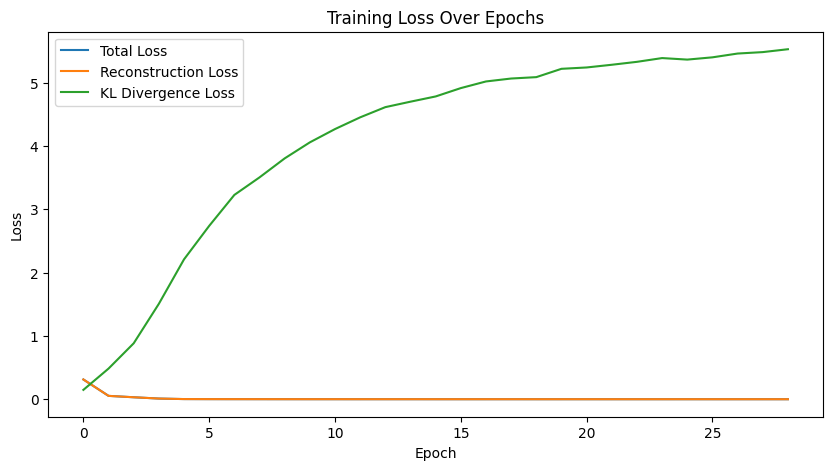

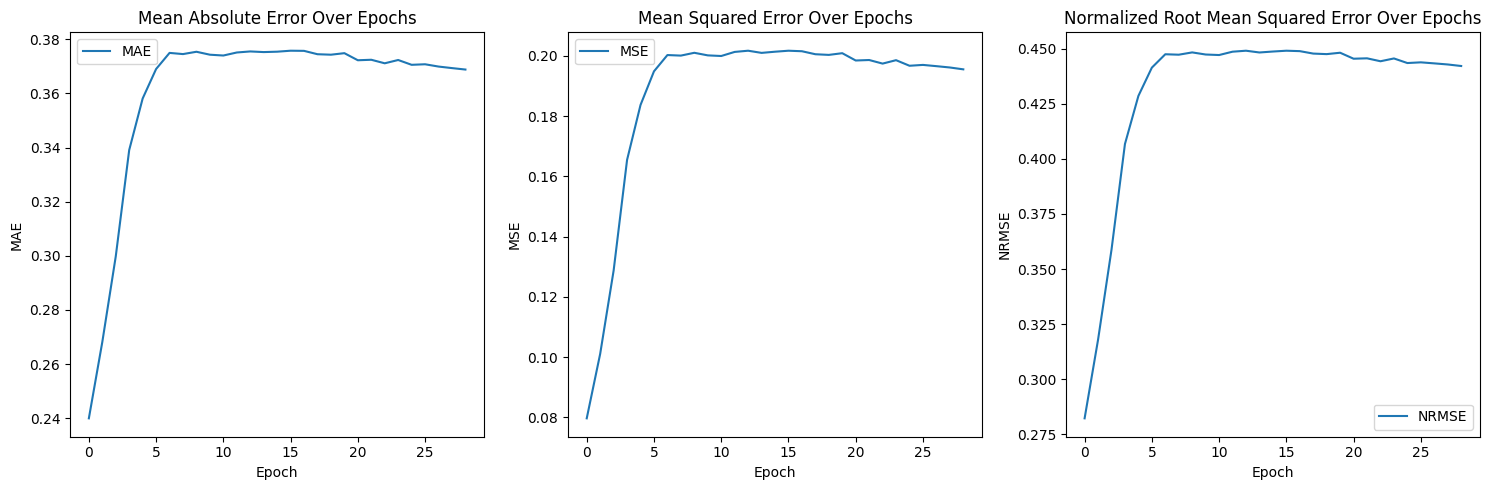

In [61]:
# Cell 4 (modified)
@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        reconstruction_loss, kl_loss, total_kl_loss = compute_loss(model, x)
        total_loss = reconstruction_loss + total_kl_loss
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return total_loss, reconstruction_loss, kl_loss

batch_size = 512
train_dataset = tf.data.Dataset.from_tensor_slices(combined_data).shuffle(10000).batch(batch_size)

epochs = 100
early_stopping_patience = 10
min_delta = 0.0001
best_loss = float('inf')
patience_counter = 0

total_loss_history = []
reconstruction_loss_history = []
kl_loss_history = []
mae_history = []
mse_history = []
nrmse_history = []

for epoch in range(epochs):
    total_loss = 0
    reconstruction_loss_sum = 0
    kl_loss_sum = 0
    num_batches = len(train_dataset)

    with tqdm(total=num_batches, desc=f'Epoch {epoch+1}/{epochs}', unit='batch') as pbar:
        for batch in train_dataset:
            total_loss_batch, reconstruction_loss, kl_loss = train_step(vae, batch, optimizer)
            total_loss += total_loss_batch
            reconstruction_loss_sum += reconstruction_loss
            kl_loss_sum += kl_loss
            pbar.update(1)
            pbar.set_postfix({'Total Loss': float(total_loss_batch), 'Reconstruction Loss': float(reconstruction_loss), 'KL Loss': float(kl_loss)})

    avg_total_loss = total_loss / num_batches
    avg_reconstruction_loss = reconstruction_loss_sum / num_batches
    avg_kl_loss = kl_loss_sum / num_batches

    total_loss_history.append(avg_total_loss)
    reconstruction_loss_history.append(avg_reconstruction_loss)
    kl_loss_history.append(avg_kl_loss)

    # Calculate MAE, MSE, NRMSE
    augmented_data = vae.decode(tf.random.normal(shape=(combined_data.shape[0], latent_dim))).numpy()
    mae = mean_absolute_error(combined_data[:, :2], augmented_data[:, :2])
    mse = mean_squared_error(combined_data[:, :2], augmented_data[:, :2])
    rmse = np.sqrt(mse)
    nrmse = rmse / (combined_data[:, :2].max() - combined_data[:, :2].min())

    mae_history.append(mae)
    mse_history.append(mse)
    nrmse_history.append(nrmse)

    print(f"Epoch {epoch+1}: Total Loss = {avg_total_loss:.6f}, Reconstruction Loss = {avg_reconstruction_loss:.6f}, KL Divergence Loss = {avg_kl_loss:.6f}")
    print(f"MAE = {mae:.6f}, MSE = {mse:.6f}, NRMSE = {nrmse:.6f}")

    if avg_total_loss < best_loss - min_delta:
        best_loss = avg_total_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Final output of metrics
print(f"Final MAE: {mae_history[-1]:.6f}")
print(f"Final MSE: {mse_history[-1]:.6f}")
print(f"Final NRMSE: {nrmse_history[-1]:.6f}")

print("Training completed.")
plt.ioff()  # Turn off interactive mode
plt.show()

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(total_loss_history, label='Total Loss')
plt.plot(reconstruction_loss_history, label='Reconstruction Loss')
plt.plot(kl_loss_history, label='KL Divergence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot MAE, MSE, and NRMSE history
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(mae_history, label='MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error Over Epochs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(nrmse_history, label='NRMSE')
plt.xlabel('Epoch')
plt.ylabel('NRMSE')
plt.title('Normalized Root Mean Squared Error Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

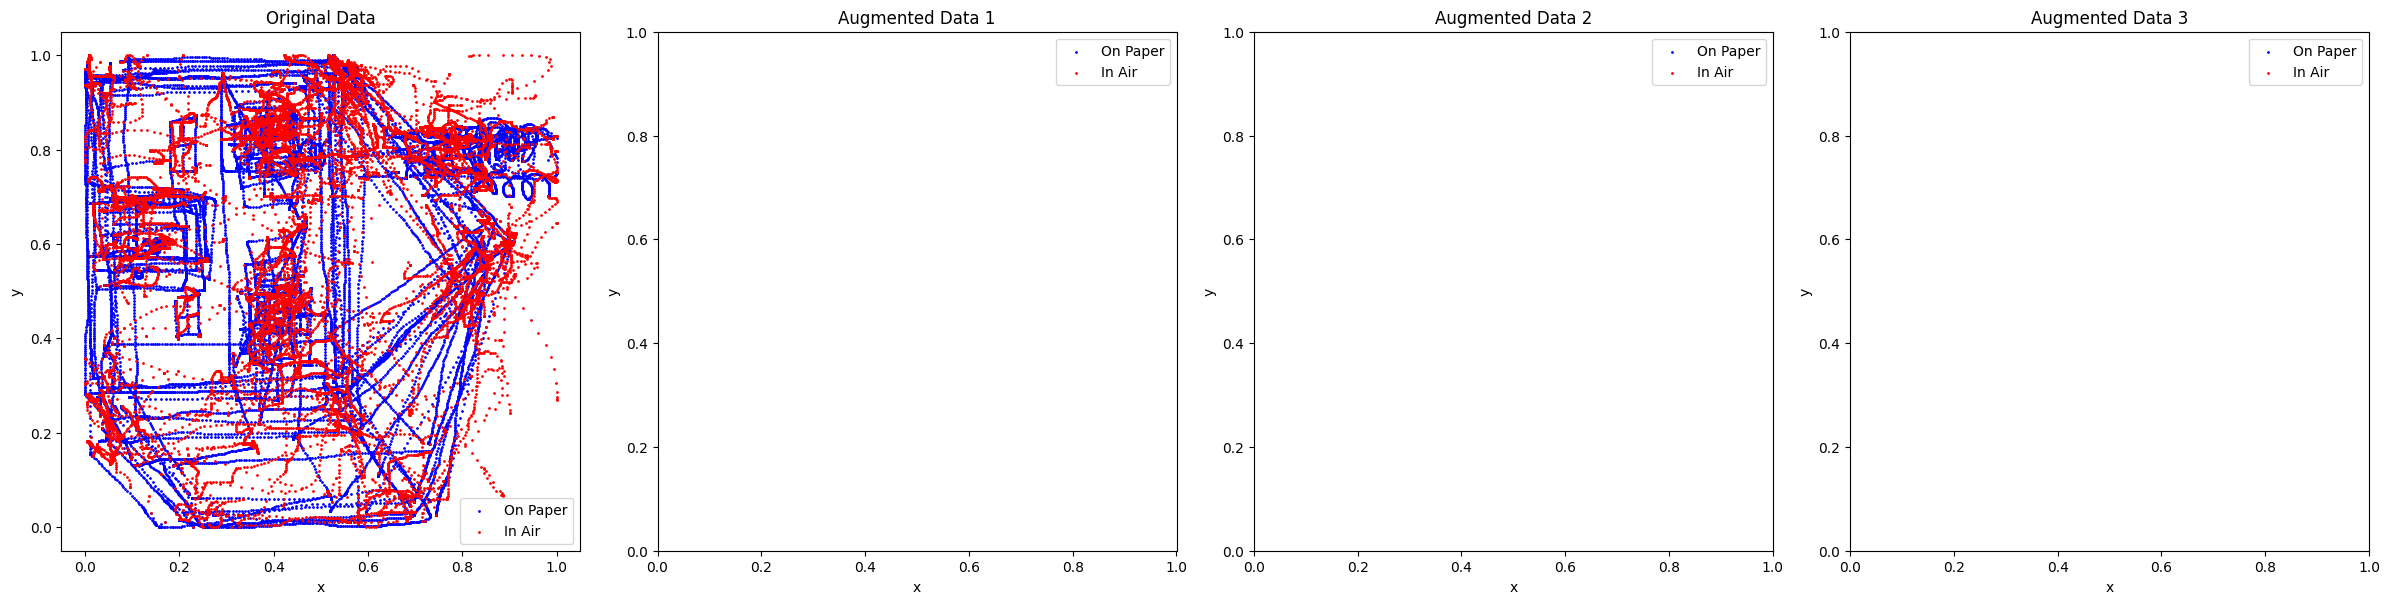

In [62]:
# Cell 5 (modified)
def generate_augmented_data(model, num_augmented_files, avg_data_points, scalers, variability=0.1):
    augmented_datasets = []
    
    for _ in range(num_augmented_files):
        # Use random normal distribution to generate latent vectors
        z = tf.random.normal(shape=(avg_data_points, model.latent_dim))
        augmented_data = model.decode(z).numpy()

        # Determine the number of data points for this augmented dataset
        num_points = int(avg_data_points * (1 + variability * (random.random() - 0.5) * 2))
        
        # Truncate or pad the augmented data to match the number of points
        if num_points < augmented_data.shape[0]:
            augmented_data = augmented_data[:num_points]
        else:
            padding = np.zeros((num_points - augmented_data.shape[0], augmented_data.shape[1]))
            augmented_data = np.vstack([augmented_data, padding])

        # Post-process pen status
        augmented_data[:, 3] = post_process_pen_status(augmented_data[:, 3])
        
        # Ensure timestamps are in sequence
        augmented_data[:, 2] = np.sort(augmented_data[:, 2])
        
        # Randomly select a scaler to inverse transform the data
        random_scaler = random.choice(scalers)
        augmented_data[:, :3] = random_scaler.inverse_transform(augmented_data[:, :3])
        
        augmented_datasets.append(augmented_data)

    return augmented_datasets

def post_process_pen_status(pen_status, threshold=0.5, min_segment_length=5):
    binary_pen_status = (pen_status > threshold).astype(int)
    
    # Smooth out rapid changes
    for i in range(len(binary_pen_status) - min_segment_length):
        if np.all(binary_pen_status[i:i+min_segment_length] == binary_pen_status[i]):
            binary_pen_status[i:i+min_segment_length] = binary_pen_status[i]
    
    return binary_pen_status

num_augmented_files = 3
augmented_datasets = generate_augmented_data(vae, num_augmented_files, avg_data_points, scalers)

# Visualize the original and augmented data side by side
fig, axs = plt.subplots(1, num_augmented_files + 1, figsize=(6*(num_augmented_files + 1), 6))
original_on_paper = combined_data[combined_data[:, 3] == 1]
original_in_air = combined_data[combined_data[:, 3] == 0]
axs[0].scatter(original_on_paper[:, 0], original_on_paper[:, 1], c='b', s=1, label='On Paper')
axs[0].scatter(original_in_air[:, 0], original_in_air[:, 1], c='r', s=1, label='In Air')
axs[0].set_title('Original Data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_aspect('equal')
axs[0].legend()

# Set consistent axis limits for square aspect ratio
x_min, x_max = combined_data[:, 0].min(), combined_data[:, 0].max()
y_min, y_max = combined_data[:, 1].min(), combined_data[:, 1].max()

for i, augmented_data in enumerate(augmented_datasets):
    augmented_on_paper = augmented_data[augmented_data[:, 3] == 1]
    augmented_in_air = augmented_data[augmented_data[:, 3] == 0]
    axs[i+1].scatter(augmented_on_paper[:, 0], augmented_on_paper[:, 1], c='b', s=1, label='On Paper')
    axs[i+1].scatter(augmented_in_air[:, 0], augmented_in_air[:, 1], c='r', s=1, label='In Air')
    axs[i+1].set_title(f'Augmented Data {i+1}')
    axs[i+1].set_xlabel('x')
    axs[i+1].set_ylabel('y')
    axs[i+1].set_aspect('equal')
    axs[i+1].set_xlim(x_min, x_max)
    axs[i+1].set_ylim(y_min, y_max)
    axs[i+1].legend()

plt.tight_layout()
plt.show()

In [9]:
# Cell 6
def download_augmented_data(augmented_datasets, scaler, directory='augmented_data'):
    if not os.path.exists(directory):
        os.makedirs(directory)

    for i, augmented_data in enumerate(augmented_datasets):
        augmented_data_original_scale = np.column_stack((
            scaler.inverse_transform(augmented_data[:, :3]),  # Inverse scale x, y, timestamp
            augmented_data[:, 3]  # Keep pen_status unchanged
        ))

        # Save each augmented dataset to a CSV file
        filename = os.path.join(directory, f'augmented_data_{i+1}.csv')
        pd.DataFrame(augmented_data_original_scale, columns=['x', 'y', 'timestamp', 'pen_status']).to_csv(filename, index=False)
        print(f"Saved {filename}")

# Call the updated function with the same scaler for all augmented datasets
download_augmented_data(augmented_datasets, scalers[0])


Saved augmented_data\augmented_data_1.csv
Saved augmented_data\augmented_data_2.csv
Saved augmented_data\augmented_data_3.csv
